In [1]:
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# EU

In [3]:
df = pd.read_csv(r"C:file.csv")
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10


In [5]:
# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10,Large Cap
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10,Large Cap
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09,Mid Cap
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09,Mid Cap
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10,Large Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10,Large Cap
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10,Large Cap
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10,Large Cap
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10,Large Cap


### GAM for predicting ESG scores

In [7]:
import os
import pickle
import numpy as np
import pandas as pd
from pygam import LinearGAM, s, f, te

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')
df['Country of Exchange'] = df['Country of Exchange'].astype('category')

df['Country_code'] = df['Country of Exchange'].cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Directory to save models
model_dir = 'saved_gam_models_gridsearch'
os.makedirs(model_dir, exist_ok=True)

# Small epsilon to avoid logit(0) or logit(1)
eps = 1e-3

# Loop over ESG targets
for target in esg_targets:
    print(f"\n🔁 Fitting GAM for {target}...")

    # Drop missing data
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])

    # Transform target to logit scale
    y_raw = df_clean[target].values
    y_scaled = np.clip(y_raw / 100, eps, 1 - eps)
    y_logit = np.log(y_scaled / (1 - y_scaled))

    # Define model structure
    gam = LinearGAM(
        s(0) + s(1) + s(2) +              # Numeric splines
        f(3) + f(4) + f(5) +              # Categorical factors
        te(3, 4) + te(3, 5) + te(4, 5) +  # Cat x Cat interactions
        te(0, 1) + te(0, 2) + te(1, 2) +  # Num x Num interactions
        te(0, 3) + te(0, 4) + te(0, 5) +  # Num x Cat interactions
        te(1, 3) + te(1, 4) + te(1, 5) +
        te(2, 3) + te(2, 4) + te(2, 5)
    )

    # Gridsearch for optimal lambda
    gam.gridsearch(X, y_logit)

    # Predict and inverse-transform to original scale
    y_pred_logit = gam.predict(X)
    y_pred_scaled = 1 / (1 + np.exp(-y_pred_logit))
    y_pred = y_pred_scaled * 100

    # Print results
    min_pred = y_pred.min()
    max_pred = y_pred.max()
    print(f"✅ Prediction range for {target}: {min_pred:.2f} to {max_pred:.2f}")
    print(f"Optimal penalties (λ): {gam.lam}")

    # 🔍 Show GAM summary and R² value
    print("\n📊 GAM Summary:")
    gam.summary()
    try:
        pseudo_r2 = gam.statistics_['pseudo_r2']
        if isinstance(pseudo_r2, dict):
            pseudo_r2 = next(iter(pseudo_r2.values()))
        print(f"\n🔢 R² for {target}: {pseudo_r2:.4f}")
    except Exception as e:
        print(f"⚠️ Could not extract R² for {target}: {e}")


    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model to: {model_path}")

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


🔁 Fitting GAM for ESG_score...


100% (11 of 11) |########################| Elapsed Time: 0:01:14 Time:  0:01:140:06
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24040\3749470767.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for ESG_score: 8.43 to 93.89
Optimal penalties (λ): [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -7464.4905
Number of Samples:                         6296 AIC:                                            15934.1187
                       

100% (11 of 11) |########################| Elapsed Time: 0:01:10 Time:  0:01:100:06
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24040\3749470767.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for Env_score: 0.04 to 97.28
Optimal penalties (λ): [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -9029.7151
Number of Samples:                         6296 AIC:                                            19064.5678
                       

100% (11 of 11) |########################| Elapsed Time: 0:01:12 Time:  0:01:120:06
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24040\3749470767.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for Soc_score: 1.55 to 98.07
Optimal penalties (λ): [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -7394.4819
Number of Samples:                         6296 AIC:                                            15794.1014
                       

100% (11 of 11) |########################| Elapsed Time: 0:01:14 Time:  0:01:140:06
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24040\3749470767.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for Gov_score: 7.03 to 97.78
Optimal penalties (λ): [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -7585.9403
Number of Samples:                         6296 AIC:                                            16177.0183
                       

100% (11 of 11) |########################| Elapsed Time: 0:01:14 Time:  0:01:140:06


✅ Prediction range for ESG_Comb_score: 7.49 to 89.96
Optimal penalties (λ): [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -7348.2016
Number of Samples:                         6296 AIC:                                            15701.5408
                  

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24040\3749470767.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


## GAM for ROA

In [9]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s, f, te
import matplotlib.pyplot as plt

def train_roa_gam_model(df):
    """
    Trains a GAM model to predict ROA based on ESG scores and categorical variables.
    
    Args:
        df (pd.DataFrame): Input DataFrame with necessary columns.
        
    Returns:
        gam (LinearGAM): Trained GAM model for ROA.
    """
    # Define target and predictors
    target = 'ROA'
    predictors = ['Env_score', 'Soc_score', 'Gov_score']
    
    # Prepare categorical codes
    df = df.copy()
    df['Country of Exchange'] = df['Country of Exchange'].astype('category')
    df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
    df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')

    df['Country_code'] = df['Country of Exchange'].cat.codes
    df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
    df['MCap_code'] = df['Market Capitalization Category'].cat.codes

    # Drop rows with missing values
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Prepare feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Penalty list for ROA
    lam = [[0.251], [0.251], [0.251], [0.251], [0.251], [0.251],
           [0.251, 0.251], [0.251, 0.251], [0.251, 0.251],
           [0.251, 0.251], [0.251, 0.251], [0.251, 0.251],
           [0.251, 0.251], [0.251, 0.251], [0.251, 0.251],
           [0.251, 0.251], [0.251, 0.251], [0.251, 0.251],
           [0.251, 0.251], [0.251, 0.251], [0.251, 0.251]]

    # Build GAM model
    gam = LinearGAM(
        s(0, lam=lam[0]) + s(1, lam=lam[1]) + s(2, lam=lam[2]) +
        f(3, lam=lam[3]) + f(4, lam=lam[4]) + f(5, lam=lam[5]) +
        te(3, 4, lam=lam[6]) + te(3, 5, lam=lam[7]) + te(4, 5, lam=lam[8]) +
        te(0, 1, lam=lam[9]) + te(0, 2, lam=lam[10]) + te(1, 2, lam=lam[11]) +
        te(0, 3, lam=lam[12]) + te(0, 4, lam=lam[13]) + te(0, 5, lam=lam[14]) +
        te(1, 3, lam=lam[15]) + te(1, 4, lam=lam[16]) + te(1, 5, lam=lam[17]) +
        te(2, 3, lam=lam[18]) + te(2, 4, lam=lam[19]) + te(2, 5, lam=lam[20])
    ).fit(X, y)

    # Optional: Show summary
    print(f"\nGAM Summary for Target: {target}")
    gam.summary()

    # Optional: Plot smooth effects of numeric variables
    for i, predictor in enumerate(predictors):
        plt.figure()
        XX = gam.generate_X_grid(term=i)
        plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
        plt.title(f'ROA ~ {predictor}')
        plt.xlabel(predictor)
        plt.ylabel(f'Partial effect on ROA')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return gam




GAM Summary for Target: ROA
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    576.6039
Link Function:                     IdentityLink Log Likelihood:                                -21672.1556
Number of Samples:                         6296 AIC:                                             44499.519
                                                AICc:                                           44616.4267
                                                GCV:                                                14.351
                                                Scale:                                             12.0064
                                                Pseudo R-Squared:                                    0.663
Feature 

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24040\3213632090.py:60: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


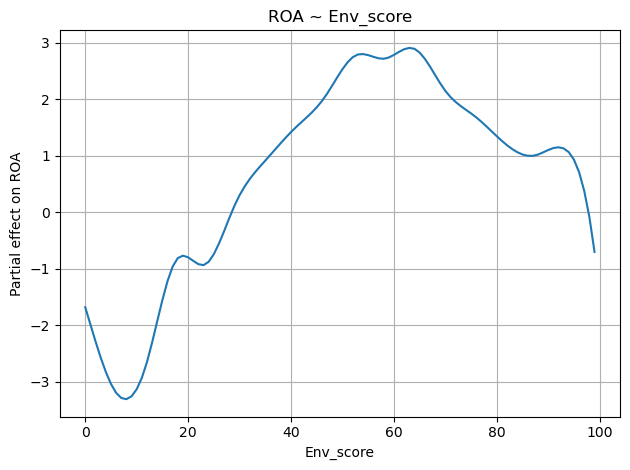

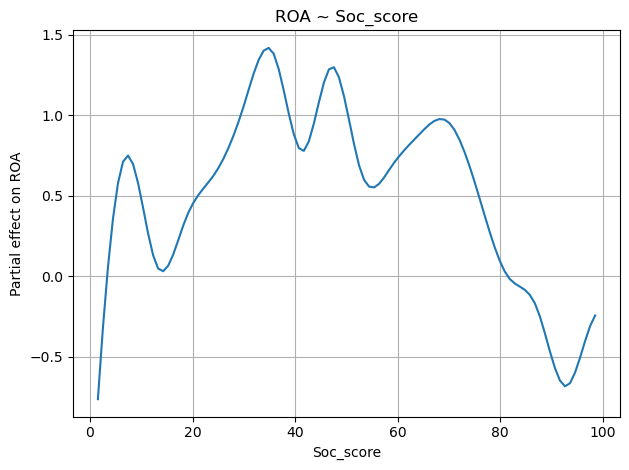

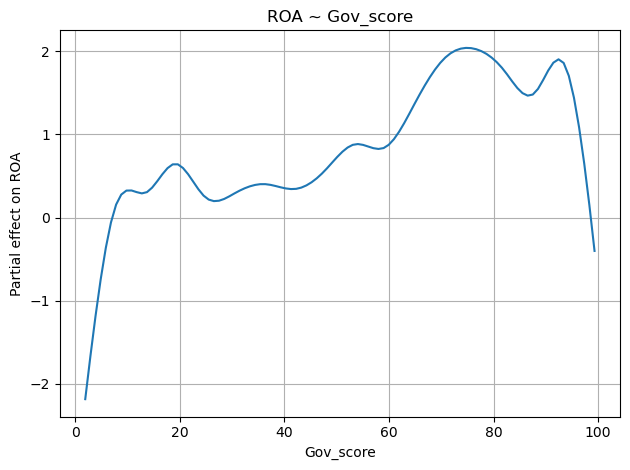

['saved_gam_models_gridsearch/gam_model_ROA.pkl']

In [11]:
gam_roa = train_roa_gam_model(df)

# Save for later use
import joblib
# joblib.dump(gam_roa, 'gam_model_ROA.pkl')
import joblib
joblib.dump(gam_roa, "saved_gam_models_gridsearch/gam_model_ROA.pkl")


In [13]:
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category,Country_code,Industry_code,MCap_code
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10,Large Cap,5,146,3
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10,Large Cap,5,146,3
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09,Mid Cap,5,146,2
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09,Mid Cap,5,146,2
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10,Large Cap,5,146,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10,Large Cap,14,50,3
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10,Large Cap,14,50,3
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10,Large Cap,14,50,3
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10,Large Cap,14,50,3


In [15]:
print("EPS - min:", df['EPS'].min())
print("EPS - max:", df['EPS'].max())

print("ROE - min:", df['ROE'].min())
print("ROE - max:", df['ROE'].max())

print("ROA - min:", df['ROA'].min())
print("ROA - min:", df['ROA'].max())

print("Min control variables industry", df['Industry_code'].min())
print("MAX control variables industry", df['Industry_code'].max())
print("Min control variables MCap_code", df['MCap_code'].min())
print("MAX control variables MCap_code", df['MCap_code'].max())
print("Min control variables Country_code", df['Country_code'].min())
print("MAX control variables Country_code", df['Country_code'].max())


EPS - min: -731.89
EPS - max: 780.29
ROE - min: -221.8
ROE - max: 529.3
ROA - min: -15.1
ROA - min: 53.4
Min control variables industry 0
MAX control variables industry 193
Min control variables MCap_code 0
MAX control variables MCap_code 4
Min control variables Country_code 0
MAX control variables Country_code 16


## Pareto with Control Variables as decision variable

In [13]:
import numpy as np
import joblib
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

# Load trained GAM models for ESG pillar scores and ROA
gam_environment = joblib.load("saved_gam_models_gridsearch/gam_model_Env_score.pkl")
gam_social = joblib.load("saved_gam_models_gridsearch/gam_model_Soc_score.pkl")
gam_governance = joblib.load("saved_gam_models_gridsearch/gam_model_Gov_score.pkl")
gam_roa = joblib.load("saved_gam_models_gridsearch/gam_model_ROA.pkl") 

class ESGWithGAMROA(Problem):
    def __init__(self):
        # Define max industry code based on your dataset (replace with actual max)
        max_industry_code = 193  
        
        super().__init__(
            n_var=5,     # EPS, ROE + country_code, industry_code, mcap_code
            n_obj=6,     # Env, Soc, Gov, EPS, GAM_ROA, ROE
            n_constr=9,  # ESG in [0, 100], EPS > 0, GAM_ROA > 0, ROE > 0
            xl=np.array([-731.89, -221.8, 0, 0, 0]),   # Lower bounds
            xu=np.array([780.29, 529.3, 16, max_industry_code, 4])  # Upper bounds
        )
        
    def _evaluate(self, X, out, *args, **kwargs):
        eps = X[:, 0]
        roe = X[:, 1]
        
        # Round category codes to integers
        country_code = np.round(X[:, 2]).astype(int)
        industry_code = np.round(X[:, 3]).astype(int)
        mcap_code = np.round(X[:, 4]).astype(int)
        
        # Clip to valid ranges
        country_code = np.clip(country_code, 0, 16)
        industry_code = np.clip(industry_code, 0, 193)
        mcap_code = np.clip(mcap_code, 0, 4)
        
        # Prepare input for GAM predictions for ESG pillars
        X_esg = np.column_stack([eps, roe, np.zeros(X.shape[0]), country_code, industry_code, mcap_code])
        
        esg_env = gam_environment.predict(X_esg)
        esg_soc = gam_social.predict(X_esg)
        esg_gov = gam_governance.predict(X_esg)
        
        # Prepare input for GAM ROA prediction
        X_roa = np.column_stack([esg_env, esg_soc, esg_gov, country_code, industry_code, mcap_code])
        predicted_roa = gam_roa.predict(X_roa)
        
        # Objectives (to maximize → minimize negative)
        out["F"] = -np.column_stack([
            esg_env,
            esg_soc,
            esg_gov,
            eps,
            predicted_roa,
            roe
        ])
        
        # Constraints
        out["G"] = np.column_stack([
            esg_env - 100,
            -esg_env,
            esg_soc - 100,
            -esg_soc,
            esg_gov - 100,
            -esg_gov,
            -eps,
            -roe,
            -predicted_roa,
        ])

# Instantiate the optimization problem
problem = ESGWithGAMROA()

# NSGA-II algorithm
algorithm = NSGA2(
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

# Run optimization
res = minimize(
    problem,
    algorithm=algorithm,
    termination=('n_gen', 200),
    seed=1,
    verbose=True
)

# Display results
if res.F is not None and len(res.F) > 0:
    pareto_solutions = res.X
    pareto_objectives = -res.F  # Flip signs back
    
    for i in range(min(10, len(pareto_solutions))):
        eps = pareto_solutions[i, 0]
        roe = pareto_solutions[i, 1]
        country = int(np.round(pareto_solutions[i, 2]))
        industry = int(np.round(pareto_solutions[i, 3]))
        mcap = int(np.round(pareto_solutions[i, 4]))
        roa = pareto_objectives[i, 4]

        print(f"\nPareto Solution {i+1}:")
        print(f"EPS: {eps:.2f}, ROE: {roe:.2f}, ROA (GAM-predicted): {roa:.2f}")
        print(f"Country code: {country}, Industry code: {industry}, Market Cap code: {mcap}")
        print(f"Environmental Score: {pareto_objectives[i, 0]:.2f}")
        print(f"Social Score:        {pareto_objectives[i, 1]:.2f}")
        print(f"Governance Score:    {pareto_objectives[i, 2]:.2f}")
        print(f"EPS (Objective):     {pareto_objectives[i, 3]:.2f}")
        print(f"ROA (Objective):     {pareto_objectives[i, 4]:.2f}")
        print(f"ROE (Objective):     {pareto_objectives[i, 5]:.2f}")
else:
    print("⚠️ No feasible Pareto solutions found.")


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      4 |  0.000000E+00 |  3.091866E+03 |             - |             -
     2 |      200 |      4 |  0.000000E+00 |  3.788653E+02 |  0.5327256618 |         ideal
     3 |      300 |     10 |  0.000000E+00 |  7.818955E+01 |  0.5422234278 |         ideal
     4 |      400 |     28 |  0.000000E+00 |  2.2324519940 |  0.1514092384 |         ideal
     5 |      500 |     52 |  0.000000E+00 |  0.000000E+00 |  0.1126433939 |         ideal
     6 |      600 |     72 |  0.000000E+00 |  0.000000E+00 |  0.0815168826 |         nadir
     7 |      700 |     92 |  0.000000E+00 |  0.000000E+00 |  0.0727817459 |             f
     8 |      800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0900954063 |         ideal
     9 |      900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0026097035 |         ideal
    10 |     1000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0931277896 |         ideal

In [15]:
print(f"Number of Pareto-optimal solutions: {len(pareto_solutions)}")

Number of Pareto-optimal solutions: 100


In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def find_knee_point(pareto_solutions, pareto_objectives):
    """
    Find the knee point (best trade-off) from Pareto-optimal solutions.

    Parameters:
    - pareto_solutions: np.ndarray of decision variable values (e.g., EPS, ROA, ROE)
    - pareto_objectives: np.ndarray of objective values (e.g., ESG scores)

    Returns:
    - knee_index: index of the knee point
    - knee_solution: decision variable values (financial ratios) of the knee point
    - knee_objectives: objective values (ESG scores) of the knee point
    """
    # Normalize objectives (scale each objective to [0, 1])
    scaler = MinMaxScaler()
    normalized_obj = scaler.fit_transform(pareto_objectives)

    # Ideal point: maximum value of each objective (we assume all objectives are to be maximized)
    ideal_point = np.max(normalized_obj, axis=0)

    # Compute Euclidean distances from each point to the ideal point
    distances = np.linalg.norm(normalized_obj - ideal_point, axis=1)

    # Knee point is the solution closest to the ideal point
    knee_index = np.argmin(distances)
    knee_solution = pareto_solutions[knee_index]         # Financial ratios
    knee_objectives = pareto_objectives[knee_index]      # ESG scores

    return knee_index, knee_solution, knee_objectives

# Call the function
knee_index, knee_solution, knee_objectives = find_knee_point(pareto_solutions, pareto_objectives)

# Print the ESG scores (objective values)
print("\n🏆 Knee Point - Objective Values (ESG scores and financial metrics):")
objective_labels = [
    "Environmental Score", "Social Score", "Governance Score",
     "EPS", "ROA", "ROE"
]
for label, value in zip(objective_labels, knee_objectives):
    print(f"{label:23}: {value:.2f}")

# Print the financial ratios (decision variables)
print("\n📊 Knee Point - Decision Variables (Financial Ratios):")
solution_labels = ["EPS", "ROA", "ROE"]
for label, value in zip(solution_labels, knee_solution):
    print(f"{label:23}: {value:.2f}")


🏆 Knee Point - Objective Values (ESG scores and financial metrics):
Environmental Score    : 80.59
Social Score           : 97.98
Governance Score       : 57.84
EPS                    : 756.51
ROA                    : 26.68
ROE                    : 110.19

📊 Knee Point - Decision Variables (Financial Ratios):
EPS                    : 756.51
ROA                    : 110.19
ROE                    : 0.83


In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_esg_vs_financial(pareto_objectives, knee_index, labels, save_path=None):
    esg_indices = [0, 1, 2]         # Environmental, Social, Governance
    fin_indices = [3, 4, 5]         # EPS, ROA, ROE
    knee_point = pareto_objectives[knee_index]

    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    fig.suptitle("Pareto Fronts: ESG vs Financial Metrics", fontsize=18)

    for row, i in enumerate(esg_indices):
        for col, j in enumerate(fin_indices):
            ax = axes[row, col]

            # Sort for connecting line
            x = pareto_objectives[:, j]
            y = pareto_objectives[:, i]
            sorted_indices = np.argsort(x)
            x_sorted = x[sorted_indices]
            y_sorted = y[sorted_indices]

            ax.scatter(x, y, label="Pareto Solutions", color="blue", alpha=0.7)
            ax.scatter(knee_point[j], knee_point[i], color="red", s=100, marker='*', label="Knee Point")

            ax.set_xlabel(labels[j])
            ax.set_ylabel(labels[i])
            ax.set_title(f"{labels[i]} vs {labels[j]}")
            ax.grid(True)
            ax.legend(fontsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Save the plot if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"✅ Plot saved to: {save_path}")

    plt.show()

✅ Plot saved to: pareto_fronts_esg_vs_financial_EU_with_control_variables.jpg


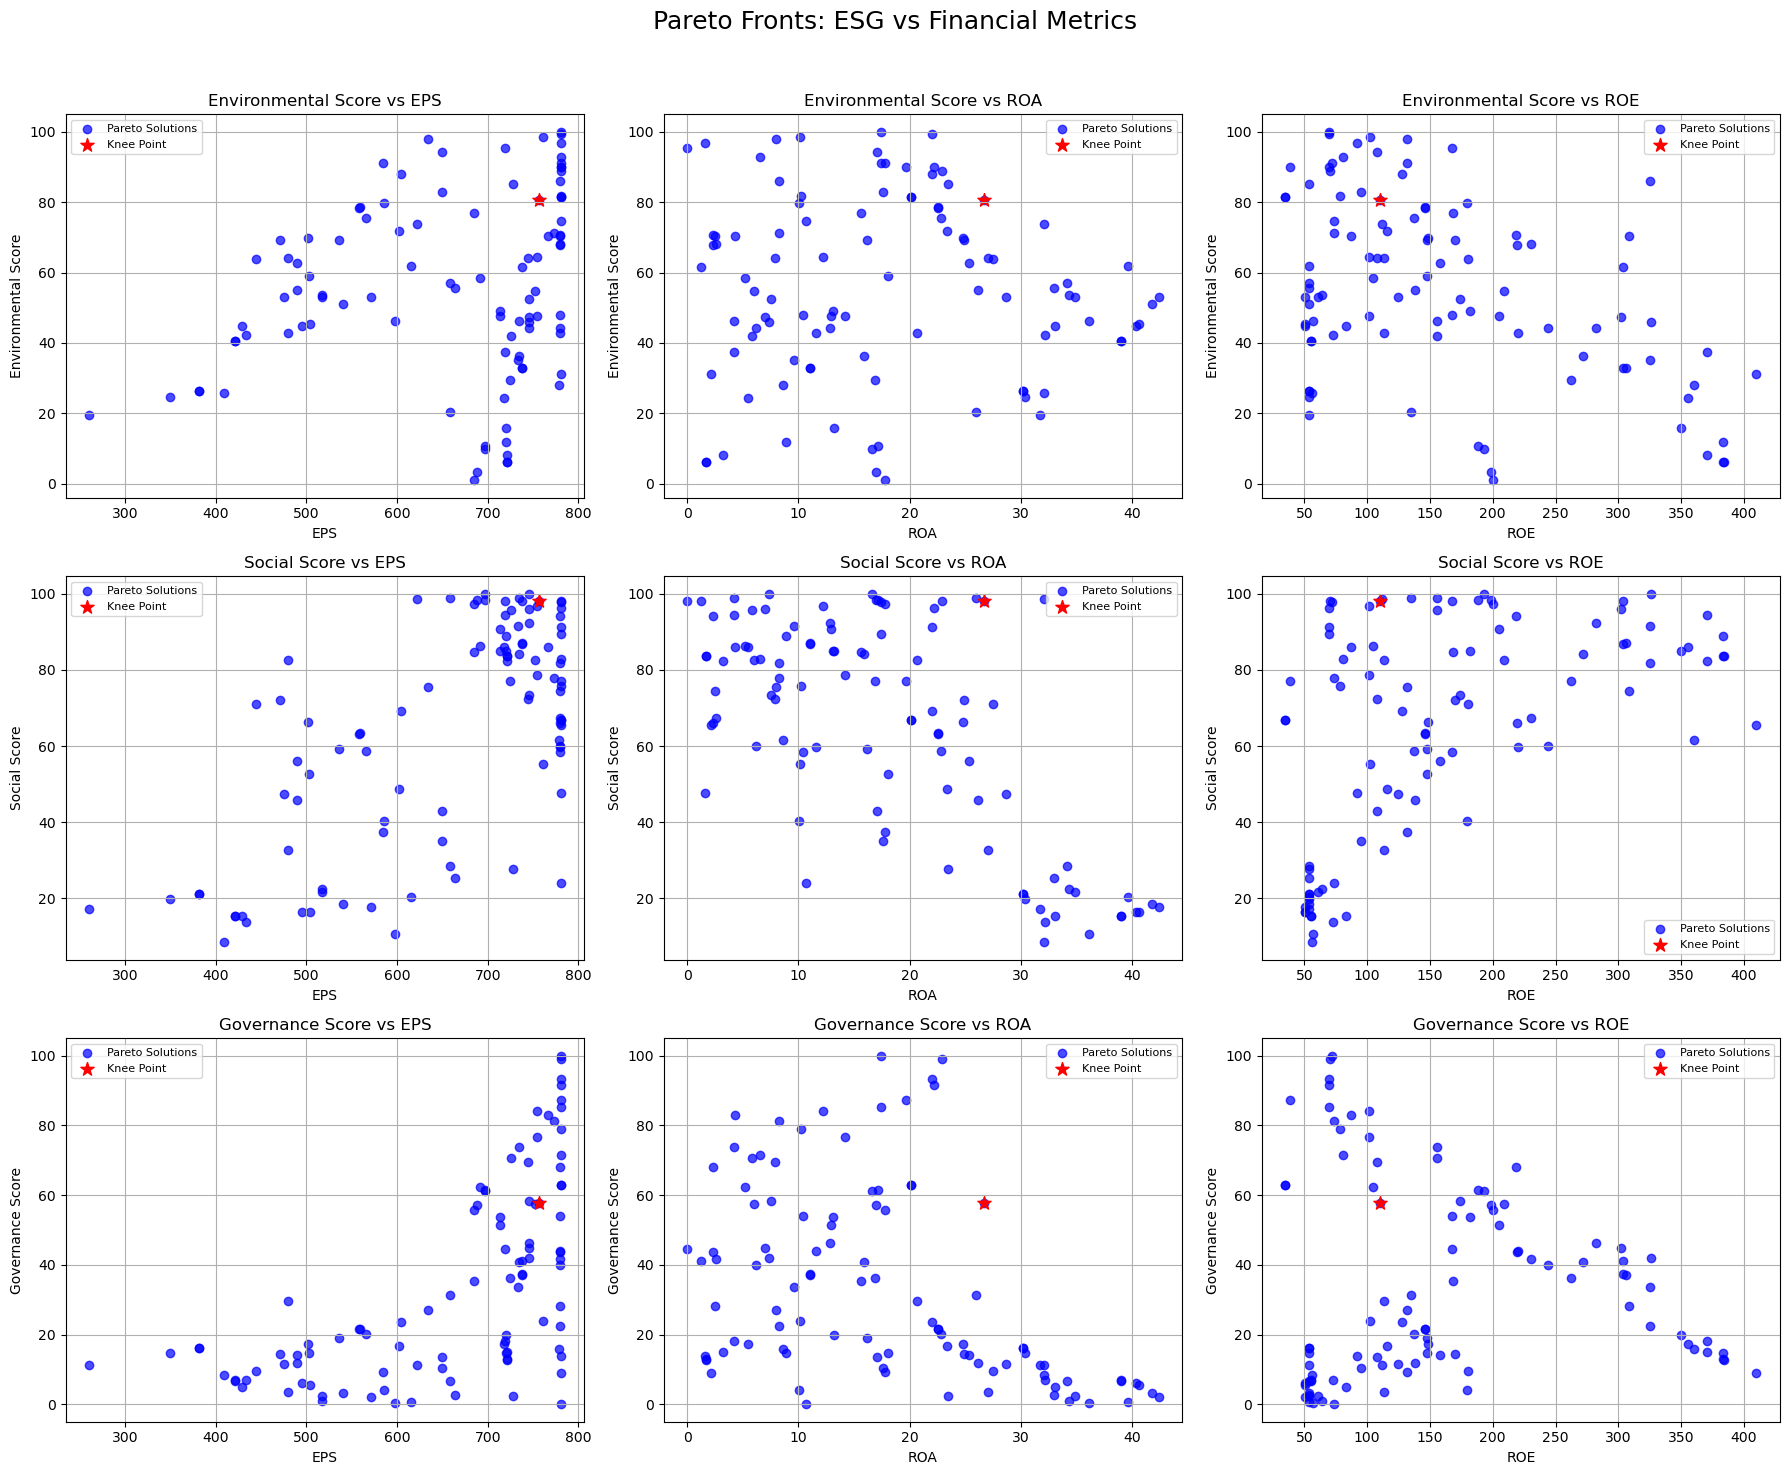

In [29]:
objective_labels = [
    "Environmental Score", "Social Score", "Governance Score",
    "EPS", "ROA", "ROE"
]

#plot_esg_vs_financial(pareto_objectives, knee_index, objective_labels)

plot_esg_vs_financial(
    pareto_objectives,
    knee_index,
    objective_labels,
    save_path="pareto_fronts_esg_vs_financial_EU_with_control_variables.jpg"
)


## Pareto

In [13]:
print("EPS - min:", df['EPS'].min())
print("EPS - max:", df['EPS'].max())

print("ROE - min:", df['ROE'].min())
print("ROE - max:", df['ROE'].max())

print("ROA - min:", df['ROA'].min())
print("ROA - min:", df['ROA'].max())

print("MAX control variables)

EPS - min: -731.89
EPS - max: 780.29
ROE - min: -221.8
ROE - max: 529.3
ROA - min: -15.1
ROA - min: 53.4


In [29]:
import numpy as np
import joblib
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

# Load trained GAM models for ESG pillar scores and ROA
gam_environment = joblib.load("saved_gam_models_gridsearch/gam_model_Env_score.pkl")
gam_social = joblib.load("saved_gam_models_gridsearch/gam_model_Soc_score.pkl")
gam_governance = joblib.load("saved_gam_models_gridsearch/gam_model_Gov_score.pkl")
gam_roa = joblib.load("saved_gam_models_gridsearch/gam_model_ROA.pkl") 

class ESGWithGAMROA(Problem):
    def __init__(self):
        super().__init__(
            n_var=2,     # EPS, ROE only (ROA is predicted)
            n_obj=6,     # Env, Soc, Gov, EPS, GAM_ROA, ROE
            n_constr=9,  # ESG in [0, 100], EPS > 0, GAM_ROA > 0, ROE > 0
            xl=np.array([-731.89, -221.8]),   # EPS, ROE
            xu=np.array([780.29, 529.3])
        )
    def _evaluate(self, X, out, *args, **kwargs):
        eps = X[:, 0]
        roe = X[:, 1]
    
        # Use random or fixed category codes
        country_code = np.zeros(X.shape[0])
        industry_code = np.zeros(X.shape[0])
        mcap_code = np.zeros(X.shape[0])
        # country_code = np.random.choice(df['Country_code'].unique(), size=X.shape[0])
        # industry_code = np.random.choice(df['Industry_code'].unique(), size=X.shape[0])
        # mcap_code = np.random.choice(df['MCap_code'].unique(), size=X.shape[0])
    
        # Dummy ESG (to be predicted)
        env = np.zeros(X.shape[0])
        soc = np.zeros(X.shape[0])
        gov = np.zeros(X.shape[0])
        
        # Predict ESG scores
        X_esg = np.column_stack([eps, roe, np.zeros(X.shape[0]), country_code, industry_code, mcap_code])
        # esg_env = np.clip(gam_environment.predict(X_esg), 0, 100)
        # esg_soc = np.clip(gam_social.predict(X_esg), 0, 100)
        # esg_gov = np.clip(gam_governance.predict(X_esg), 0, 100)

        esg_env = gam_environment.predict(X_esg)
        esg_soc = gam_social.predict(X_esg)
        esg_gov = gam_governance.predict(X_esg)
    
        # Predict ROA from ESG
        # X_roa = np.column_stack([esg_env, esg_soc, esg_gov, country_code, industry_code, mcap_code])
        X_roa = np.column_stack([esg_env, esg_soc, esg_gov, country_code, industry_code, mcap_code])
        predicted_roa = gam_roa.predict(X_roa)
    
        # Objectives (to maximize → minimize negative)
        out["F"] = -np.column_stack([
            esg_env,
            esg_soc,
            esg_gov,
            eps,
            predicted_roa,
            roe
        ])
    
        # Constraints
        out["G"] = np.column_stack([
            esg_env - 100,
            -esg_env,
            esg_soc - 100,
            -esg_soc,
            esg_gov - 100,
            -esg_gov,
            -eps,
            -roe,
            -predicted_roa,
        ])

# Instantiate the optimization problem
problem = ESGWithGAMROA()

# NSGA-II algorithm
algorithm = NSGA2(
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

# Run optimization
res = minimize(
    problem,
    algorithm=algorithm,
    termination=('n_gen', 200),
    seed=1,
    verbose=True
)

# Display results
if res.F is not None and len(res.F) > 0:
    pareto_solutions = res.X
    pareto_objectives = -res.F  # Flip signs back

    for i in range(min(10, len(pareto_solutions))):
        eps = pareto_solutions[i, 0]
        roe = pareto_solutions[i, 1]
        roa = pareto_objectives[i, 4]

        print(f"\nPareto Solution {i+1}:")
        print(f"EPS: {eps:.2f}, ROE: {roe:.2f}, ROA (GAM-predicted): {roa:.2f}")
        print(f"Environmental Score: {pareto_objectives[i, 0]:.2f}")
        print(f"Social Score:        {pareto_objectives[i, 1]:.2f}")
        print(f"Governance Score:    {pareto_objectives[i, 2]:.2f}")
        print(f"EPS (Objective):     {pareto_objectives[i, 3]:.2f}")
        print(f"ROA (Objective):     {pareto_objectives[i, 4]:.2f}")
        print(f"ROE (Objective):     {pareto_objectives[i, 5]:.2f}")
else:
    print("⚠️ No feasible Pareto solutions found.")


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      4 |  0.000000E+00 |  3.413148E+03 |             - |             -
     2 |      200 |     12 |  0.000000E+00 |  4.097094E+02 |  0.1269170754 |         ideal
     3 |      300 |     21 |  0.000000E+00 |  8.324224E+01 |  0.1072198707 |         ideal
     4 |      400 |     41 |  0.000000E+00 |  0.3185640370 |  0.1492684419 |         ideal
     5 |      500 |     67 |  0.000000E+00 |  0.000000E+00 |  0.1096203939 |         ideal
     6 |      600 |     86 |  0.000000E+00 |  0.000000E+00 |  0.0791270431 |         ideal
     7 |      700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.1183682280 |         nadir
     8 |      800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0705868284 |         nadir
     9 |      900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0950457908 |         ideal
    10 |     1000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0130749581 |             f

In [17]:
print(f"Number of Pareto-optimal solutions: {len(pareto_solutions)}")

Number of Pareto-optimal solutions: 100


In [17]:
import pandas as pd

df = pd.DataFrame(pareto_objectives, columns=[
    "Environmental Score", "Social Score", "Governance Score", "EPS", "ROA", "ROE"
])
print(df.describe())


       Environmental Score  Social Score  Governance Score         EPS  \
count           100.000000    100.000000        100.000000  100.000000   
mean             33.790758     75.200038         70.866184  570.566750   
std              22.561660     19.577478         14.990256  124.990210   
min               0.016360     40.043378         47.254087  366.703902   
25%              16.571708     60.685825         59.829821  462.505459   
50%              31.845090     73.846320         68.343220  564.589700   
75%              49.918876     96.619826         80.392981  675.226182   
max              80.768468     99.994426         99.265279  780.290000   

              ROA         ROE  
count  100.000000  100.000000  
mean    19.309921   48.092843  
std      3.194343   18.299094  
min     13.716866    3.826307  
25%     16.662148   34.202265  
50%     19.993442   51.386093  
75%     21.511408   62.265905  
max     25.726922   81.336023  


In [31]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def find_knee_point(pareto_solutions, pareto_objectives):
    """
    Find the knee point (best trade-off) from Pareto-optimal solutions.

    Parameters:
    - pareto_solutions: np.ndarray of decision variable values (e.g., EPS, ROA, ROE)
    - pareto_objectives: np.ndarray of objective values (e.g., ESG scores)

    Returns:
    - knee_index: index of the knee point
    - knee_solution: decision variable values (financial ratios) of the knee point
    - knee_objectives: objective values (ESG scores) of the knee point
    """
    # Normalize objectives (scale each objective to [0, 1])
    scaler = MinMaxScaler()
    normalized_obj = scaler.fit_transform(pareto_objectives)

    # Ideal point: maximum value of each objective (we assume all objectives are to be maximized)
    ideal_point = np.max(normalized_obj, axis=0)

    # Compute Euclidean distances from each point to the ideal point
    distances = np.linalg.norm(normalized_obj - ideal_point, axis=1)

    # Knee point is the solution closest to the ideal point
    knee_index = np.argmin(distances)
    knee_solution = pareto_solutions[knee_index]         # Financial ratios
    knee_objectives = pareto_objectives[knee_index]      # ESG scores

    return knee_index, knee_solution, knee_objectives

# Call the function
knee_index, knee_solution, knee_objectives = find_knee_point(pareto_solutions, pareto_objectives)

# Print the ESG scores (objective values)
print("\n🏆 Knee Point - Objective Values (ESG scores and financial metrics):")
objective_labels = [
    "Environmental Score", "Social Score", "Governance Score",
     "EPS", "ROA", "ROE"
]
for label, value in zip(objective_labels, knee_objectives):
    print(f"{label:23}: {value:.2f}")

# Print the financial ratios (decision variables)
print("\n📊 Knee Point - Decision Variables (Financial Ratios):")
solution_labels = ["EPS", "ROA", "ROE"]
for label, value in zip(solution_labels, knee_solution):
    print(f"{label:23}: {value:.2f}")




🏆 Knee Point - Objective Values (ESG scores and financial metrics):
Environmental Score    : 76.11
Social Score           : 98.17
Governance Score       : 96.45
EPS                    : 753.26
ROA                    : 16.56
ROE                    : 42.95

📊 Knee Point - Decision Variables (Financial Ratios):
EPS                    : 753.26
ROA                    : 42.95


In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_esg_vs_financial(pareto_objectives, knee_index, labels, save_path=None):
    esg_indices = [0, 1, 2]         # Environmental, Social, Governance
    fin_indices = [3, 4, 5]         # EPS, ROA, ROE
    knee_point = pareto_objectives[knee_index]

    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    fig.suptitle("Pareto Fronts: ESG vs Financial Metrics", fontsize=18)

    for row, i in enumerate(esg_indices):
        for col, j in enumerate(fin_indices):
            ax = axes[row, col]

            # Sort for connecting line
            x = pareto_objectives[:, j]
            y = pareto_objectives[:, i]
            sorted_indices = np.argsort(x)
            x_sorted = x[sorted_indices]
            y_sorted = y[sorted_indices]

            ax.scatter(x, y, label="Pareto Solutions", color="blue", alpha=0.7)
            ax.scatter(knee_point[j], knee_point[i], color="red", s=100, marker='*', label="Knee Point")

            ax.set_xlabel(labels[j])
            ax.set_ylabel(labels[i])
            ax.set_title(f"{labels[i]} vs {labels[j]}")
            ax.grid(True)
            ax.legend(fontsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Save the plot if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"✅ Plot saved to: {save_path}")

    plt.show()



✅ Plot saved to: pareto_fronts_esg_vs_financial_EU.jpg


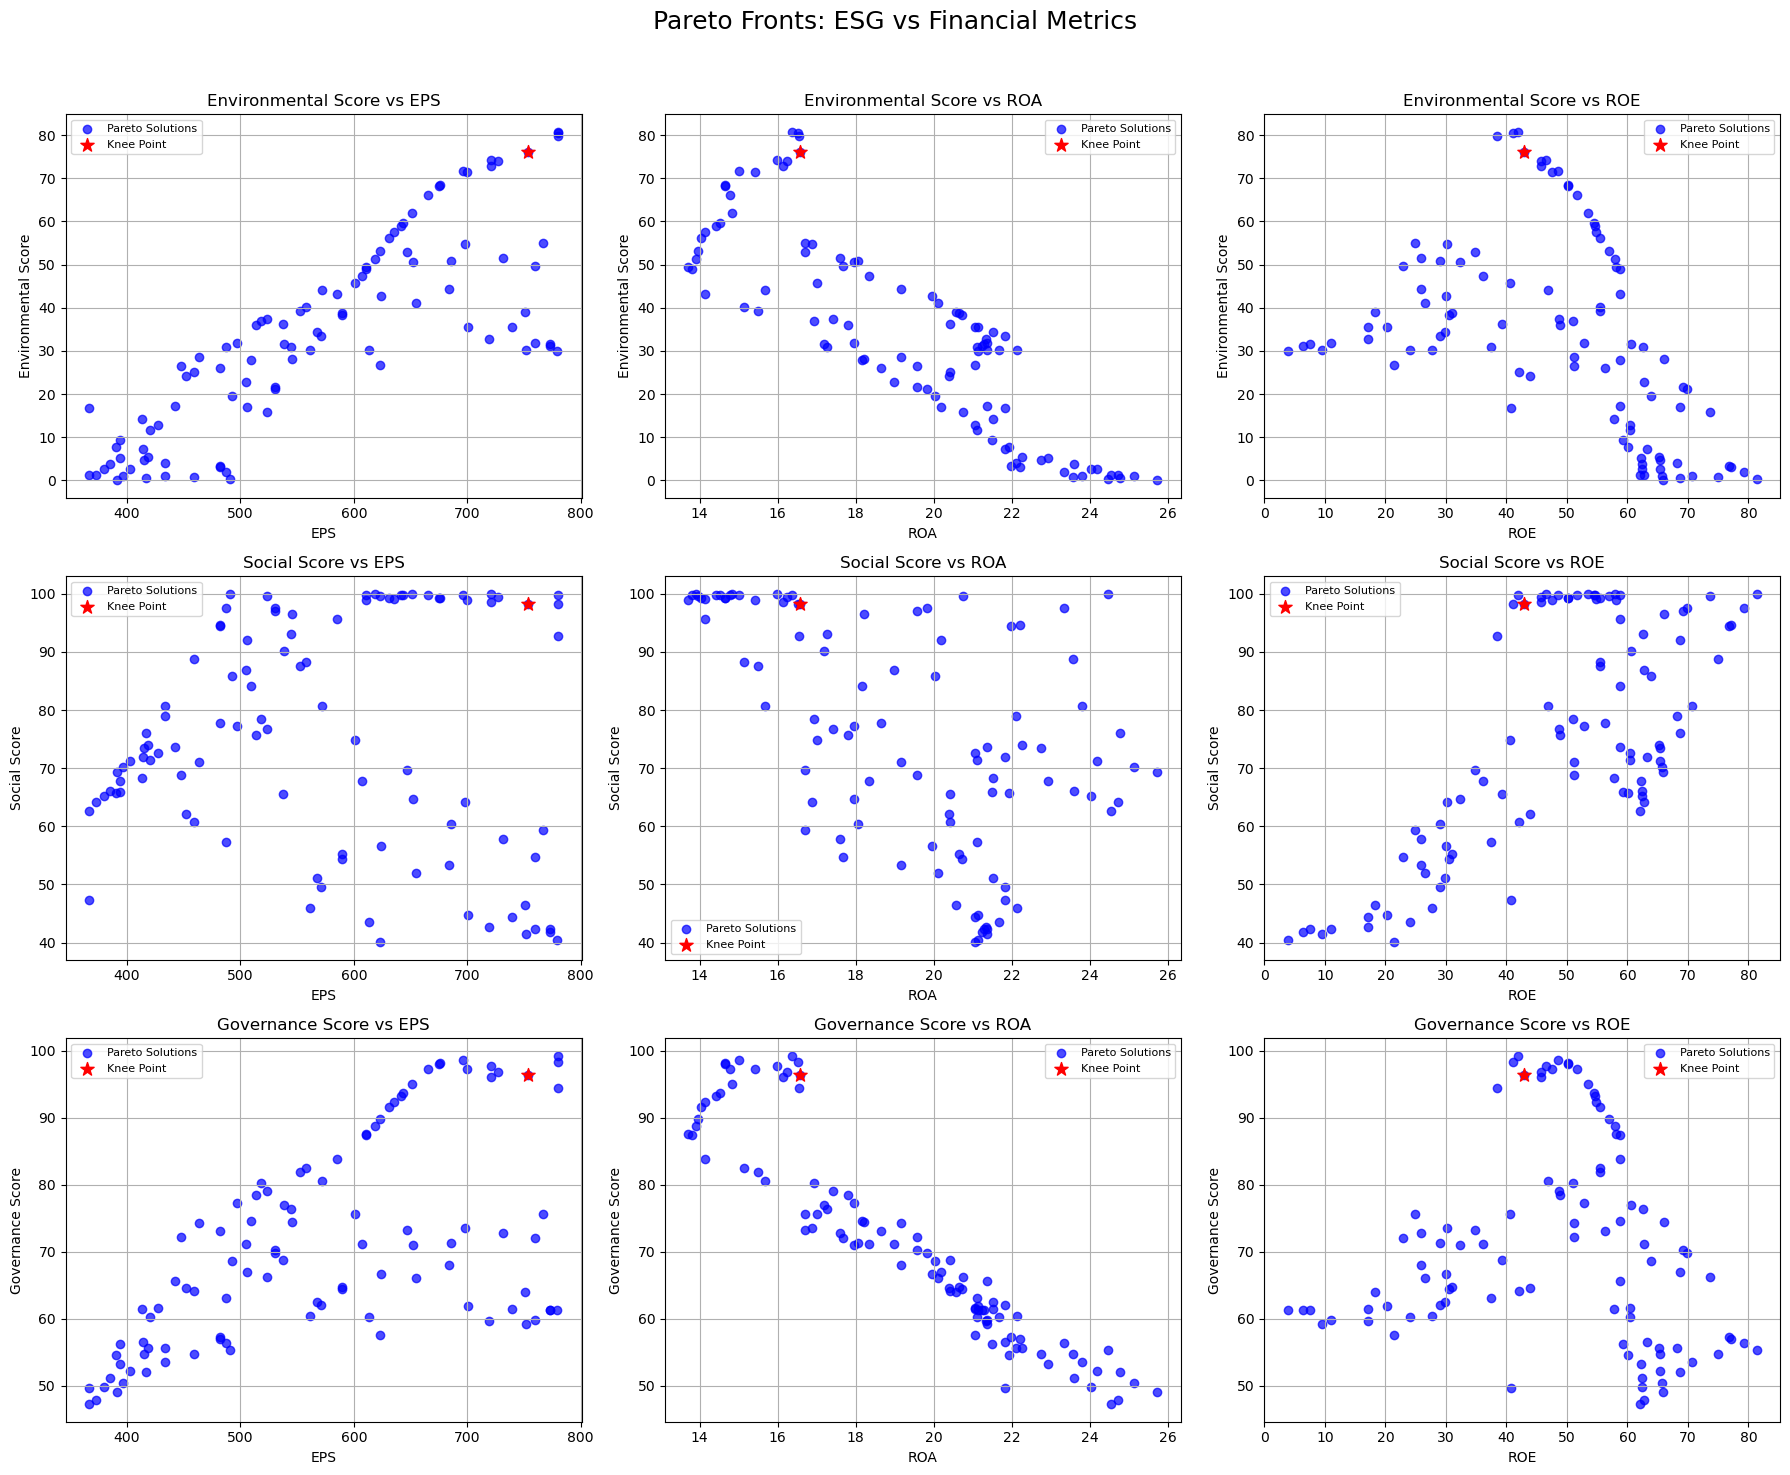

In [35]:
objective_labels = [
    "Environmental Score", "Social Score", "Governance Score",
    "EPS", "ROA", "ROE"
]

# plot_esg_vs_financial(pareto_objectives, knee_index, objective_labels)

plot_esg_vs_financial(
    pareto_objectives,
    knee_index,
    objective_labels,
    save_path="pareto_fronts_esg_vs_financial_EU.jpg"
)



# USA

In [3]:
df = pd.read_csv(r"C:file.csv")
df 

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2007,1.82,9.8,22.8,74.71,62.36,87.40,63.75,74.71,1.018590e+10
1,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2008,1.96,9.8,28.5,78.14,60.83,86.38,75.37,56.93,5.553723e+09
2,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2009,0.80,3.7,11.2,72.79,77.60,82.29,58.04,61.40,6.105464e+09
3,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2010,2.00,7.3,22.2,75.00,73.20,87.21,59.77,75.00,8.619436e+09
4,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2011,2.95,11.2,27.9,78.09,77.28,89.17,63.89,78.09,9.204053e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2019,3.13,15.8,77.1,59.13,54.75,65.89,52.25,59.13,6.303821e+10
4581,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2020,3.64,15.7,71.7,64.81,56.85,77.76,50.80,64.81,7.865682e+10
4582,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2021,3.85,14.7,50.0,65.85,64.32,77.45,49.63,65.85,1.154569e+11
4583,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2022,4.70,16.3,53.9,72.22,65.93,78.24,67.85,72.22,6.830285e+10


In [5]:
# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)
df

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category
0,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2007,1.82,9.8,22.8,74.71,62.36,87.40,63.75,74.71,1.018590e+10,Large Cap
1,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2008,1.96,9.8,28.5,78.14,60.83,86.38,75.37,56.93,5.553723e+09,Mid Cap
2,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2009,0.80,3.7,11.2,72.79,77.60,82.29,58.04,61.40,6.105464e+09,Mid Cap
3,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2010,2.00,7.3,22.2,75.00,73.20,87.21,59.77,75.00,8.619436e+09,Mid Cap
4,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2011,2.95,11.2,27.9,78.09,77.28,89.17,63.89,78.09,9.204053e+09,Mid Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2019,3.13,15.8,77.1,59.13,54.75,65.89,52.25,59.13,6.303821e+10,Large Cap
4581,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2020,3.64,15.7,71.7,64.81,56.85,77.76,50.80,64.81,7.865682e+10,Large Cap
4582,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2021,3.85,14.7,50.0,65.85,64.32,77.45,49.63,65.85,1.154569e+11,Large Cap
4583,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2022,4.70,16.3,53.9,72.22,65.93,78.24,67.85,72.22,6.830285e+10,Large Cap


### GAM ESG

In [7]:
import os
import pickle
import numpy as np
import pandas as pd
from pygam import LinearGAM, s, f, te

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Directory to save models
model_dir = 'saved_gam_models_gridsearch'
os.makedirs(model_dir, exist_ok=True)

# Small epsilon to avoid logit(0) or logit(1)
eps = 1e-3

# Loop over ESG targets
for target in esg_targets:
    print(f"\n🔁 Fitting GAM for {target}...")

    # Drop missing data
    df_clean = df.dropna(subset=predictors + [target, 'Industry_code', 'MCap_code']).copy()

    # Feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])

    # Transform target to logit scale
    y_raw = df_clean[target].values
    y_scaled = np.clip(y_raw / 100, eps, 1 - eps)
    y_logit = np.log(y_scaled / (1 - y_scaled))

    # Define model structure
    gam = LinearGAM(
        s(0) + s(1) + s(2) +
        f(3) + f(4) +
        te(3, 4) +
        te(0, 1) + te(0, 2) + te(1, 2) +
        te(0, 3) + te(0, 4) +
        te(1, 3) + te(1, 4) +
        te(2, 3) + te(2, 4)
    )

    # Gridsearch for optimal lambda
    gam.gridsearch(X, y_logit)

    # Predict and inverse-transform to original scale
    y_pred_logit = gam.predict(X)
    y_pred_scaled = 1 / (1 + np.exp(-y_pred_logit))
    y_pred = y_pred_scaled * 100

    # Print results
    min_pred = y_pred.min()
    max_pred = y_pred.max()
    print(f"✅ Prediction range for {target}: {min_pred:.2f} to {max_pred:.2f}")
    print(f"Optimal penalties (λ): {gam.lam}")

    # 🔍 Show GAM summary and R² value
    print("\n📊 GAM Summary:")
    gam.summary()
    try:
        pseudo_r2 = gam.statistics_['pseudo_r2']
        if isinstance(pseudo_r2, dict):
            pseudo_r2 = next(iter(pseudo_r2.values()))
        print(f"\n🔢 R² for {target}: {pseudo_r2:.4f}")
    except Exception as e:
        print(f"⚠️ Could not extract R² for {target}: {e}")


    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model to: {model_path}")

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


🔁 Fitting GAM for ESG_score...


100% (11 of 11) |########################| Elapsed Time: 0:00:33 Time:  0:00:330:03
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_16820\397589946.py:69: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for ESG_score: 7.44 to 91.86
Optimal penalties (λ): [[0.015848931924611134], [0.015848931924611134], [0.015848931924611134], [0.015848931924611134], [0.015848931924611134], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                

100% (11 of 11) |########################| Elapsed Time: 0:00:32 Time:  0:00:320:02
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_16820\397589946.py:69: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for Env_score: 0.01 to 98.22
Optimal penalties (λ): [[0.0630957344480193], [0.0630957344480193], [0.0630957344480193], [0.0630957344480193], [0.0630957344480193], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    262.5681
Link Function:       

100% (11 of 11) |########################| Elapsed Time: 0:00:30 Time:  0:00:300:02
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_16820\397589946.py:69: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for Soc_score: 4.70 to 97.51
Optimal penalties (λ): [[0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    341.0776
Link Function:                     IdentityLink Log Likelihood:                                 -5312.7088
Number of Samples:                         4585 AIC:                                            11309.5728
                                                AICc:                                           11364.9058
                         

100% (11 of 11) |########################| Elapsed Time: 0:00:30 Time:  0:00:300:02
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_16820\397589946.py:69: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for Gov_score: 6.22 to 97.07
Optimal penalties (λ): [[0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    235.6

100% (11 of 11) |########################| Elapsed Time: 0:00:29 Time:  0:00:290:02


✅ Prediction range for ESG_Comb_score: 9.97 to 89.70
Optimal penalties (λ): [[0.0630957344480193], [0.0630957344480193], [0.0630957344480193], [0.0630957344480193], [0.0630957344480193], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    262.5681
Link Function:  

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_16820\397589946.py:69: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


### GAM ROA

In [11]:
import os
import pickle
import numpy as np
import pandas as pd
from pygam import LinearGAM, s, f, te

# Assuming df is your DataFrame loaded already
# Define ESG targets and predictors
target = 'ROA'
predictors = ['Env_score', 'Soc_score', 'Gov_score']

# Convert categorical variables to category codes
df = df.copy()
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Drop rows with missing data in relevant columns
df_clean = df.dropna(subset=predictors + [target, 'Industry_code', 'MCap_code']).copy()

# Prepare features and target
X_num = df_clean[predictors].values  # numerical features
X_cat = df_clean[['Industry_code', 'MCap_code']].values.astype(int)  # categorical as int codes
X = np.hstack([X_num, X_cat])
y = df_clean[target].values

# Define penalties for each term (15 terms total as per model)
penalties = [
    [1.0], [1.0], [1.0],               # s(0), s(1), s(2)
    [1.0], [1.0],                    # f(3), f(4)
    [1.0, 1.0],                     # te(3,4)
    [1.0, 1.0], [1.0, 1.0], [1.0, 1.0],  # te(0,1), te(0,2), te(1,2)
    [1.0, 1.0], [1.0, 1.0],          # te(0,3), te(0,4)
    [1.0, 1.0], [1.0, 1.0],          # te(1,3), te(1,4)
    [1.0, 1.0], [1.0, 1.0]           # te(2,3), te(2,4)
]

# Build and fit the GAM
gam = LinearGAM(
    s(0, lam=penalties[0]) + s(1, lam=penalties[1]) + s(2, lam=penalties[2]) +
    f(3, lam=penalties[3]) + f(4, lam=penalties[4]) +
    te(3, 4, lam=penalties[5]) +
    te(0, 1, lam=penalties[6]) + te(0, 2, lam=penalties[7]) + te(1, 2, lam=penalties[8]) +
    te(0, 3, lam=penalties[9]) + te(0, 4, lam=penalties[10]) +
    te(1, 3, lam=penalties[11]) + te(1, 4, lam=penalties[12]) +
    te(2, 3, lam=penalties[13]) + te(2, 4, lam=penalties[14])
).fit(X, y)

# Print summary
print(f"\nGAM Summary for Target: {target}")
gam.summary()

# Save model for later use
model_dir = 'models'  # adjust or create this directory if needed
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
with open(model_path, 'wb') as file_handle:
    pickle.dump(gam, file_handle)
print(f"✅ Saved GAM model for {target} to: {model_path}")



GAM Summary for Target: ROA
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    318.6952
Link Function:                     IdentityLink Log Likelihood:                                -18177.0587
Number of Samples:                         4585 AIC:                                            36993.5078
                                                AICc:                                           37041.5929
                                                GCV:                                               23.4671
                                                Scale:                                             20.5505
                                                Pseudo R-Squared:                                   0.5315
Feature 

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_16820\1587406264.py:52: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [15]:
print("EPS - min:", df['EPS'].min())
print("EPS - max:", df['EPS'].max())

print("ROE - min:", df['ROE'].min())
print("ROE - max:", df['ROE'].max())

print("ROA - min:", df['ROA'].min())
print("ROA - min:", df['ROA'].max())

print("Min control variables industry", df['Industry_code'].min())
print("MAX control variables industry", df['Industry_code'].max())
print("Min control variables MCap_code", df['MCap_code'].min())
print("MAX control variables MCap_code", df['MCap_code'].max())
# print("Min control variables Country_code", df['Country_code'].min())
# print("MAX control variables Country_code", df['Country_code'].max())

EPS - min: -46.4
EPS - max: 73.6
ROE - min: -372.2
ROE - max: 612.3
ROA - min: -40.4
ROA - min: 51.7
Min control variables industry 0
MAX control variables industry 150
Min control variables MCap_code 1
MAX control variables MCap_code 4


In [17]:
import numpy as np
import joblib
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

# Load trained GAM models for ESG pillar scores and ROA
gam_environment = joblib.load("saved_gam_models_gridsearch/gam_model_Env_score.pkl")
gam_social = joblib.load("saved_gam_models_gridsearch/gam_model_Soc_score.pkl")
gam_governance = joblib.load("saved_gam_models_gridsearch/gam_model_Gov_score.pkl")
gam_roa = joblib.load("models\gam_model_ROA.pkl") 

class ESGWithGAMROA_NoCountry(Problem):
    def __init__(self):
        max_industry_code = 150
        
        super().__init__(
            n_var=4,     # EPS, ROE, industry_code, mcap_code
            n_obj=6,     # Env, Soc, Gov, EPS, GAM_ROA, ROE
            n_constr=9,  # ESG in [0, 100], EPS > 0, GAM_ROA > 0, ROE > 0
            xl=np.array([-46.4, -372.2, 0, 1]),  # Removed country_code
            xu=np.array([73.6, 612.3, max_industry_code, 4])
        )

    def _evaluate(self, X, out, *args, **kwargs):
        eps = X[:, 0]
        roe = X[:, 1]
        industry_code = np.round(X[:, 2]).astype(int)
        mcap_code = np.round(X[:, 3]).astype(int)

        # Clip to valid ranges
        industry_code = np.clip(industry_code, 0, 193)
        mcap_code = np.clip(mcap_code, 0, 4)

        # Input for ESG GAM models: [eps, roe, 0 (placeholder), industry_code, mcap_code]
        dummy_country = np.zeros(X.shape[0])  # Replace country_code with 0
        X_esg = np.column_stack([eps, roe, dummy_country, industry_code, mcap_code])

        esg_env = gam_environment.predict(X_esg)
        esg_soc = gam_social.predict(X_esg)
        esg_gov = gam_governance.predict(X_esg)

        # Input for ROA GAM model: [esg_env, esg_soc, esg_gov, industry_code, mcap_code]
        X_roa = np.column_stack([esg_env, esg_soc, esg_gov, industry_code, mcap_code])
        predicted_roa = gam_roa.predict(X_roa)

        out["F"] = -np.column_stack([
            esg_env,
            esg_soc,
            esg_gov,
            eps,
            predicted_roa,
            roe
        ])

        out["G"] = np.column_stack([
            esg_env - 100,
            -esg_env,
            esg_soc - 100,
            -esg_soc,
            esg_gov - 100,
            -esg_gov,
            -eps,
            -roe,
            -predicted_roa,
        ])

# Instantiate the optimization problem
problem = ESGWithGAMROA_NoCountry()

# NSGA-II algorithm
algorithm = NSGA2(
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

# Run optimization
res = minimize(
    problem,
    algorithm=algorithm,
    termination=('n_gen', 200),
    seed=1,
    verbose=True
)

# Display results
if res.F is not None and len(res.F) > 0:
    pareto_solutions = res.X
    pareto_objectives = -res.F

    for i in range(min(10, len(pareto_solutions))):
        eps = pareto_solutions[i, 0]
        roe = pareto_solutions[i, 1]
        industry = int(np.round(pareto_solutions[i, 2]))
        mcap = int(np.round(pareto_solutions[i, 3]))
        roa = pareto_objectives[i, 4]

        print(f"\nPareto Solution {i+1}:")
        print(f"EPS: {eps:.2f}, ROE: {roe:.2f}, ROA (GAM-predicted): {roa:.2f}")
        print(f"Industry code: {industry}, Market Cap code: {mcap}")
        print(f"Environmental Score: {pareto_objectives[i, 0]:.2f}")
        print(f"Social Score:        {pareto_objectives[i, 1]:.2f}")
        print(f"Governance Score:    {pareto_objectives[i, 2]:.2f}")
        print(f"EPS (Objective):     {pareto_objectives[i, 3]:.2f}")
        print(f"ROA (Objective):     {pareto_objectives[i, 4]:.2f}")
        print(f"ROE (Objective):     {pareto_objectives[i, 5]:.2f}")
else:
    print("⚠️ No feasible Pareto solutions found.")


<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\g'
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_16820\2115213460.py:14: SyntaxWarning: invalid escape sequence '\g'
  gam_roa = joblib.load("models\gam_model_ROA.pkl")


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      3 |  0.000000E+00 |  3.584413E+02 |             - |             -
     2 |      200 |      6 |  0.000000E+00 |  6.254616E+01 |  0.7797465242 |         ideal
     3 |      300 |     10 |  0.000000E+00 |  8.5948784012 |  0.3039343361 |         ideal
     4 |      400 |     11 |  0.000000E+00 |  0.0972075434 |  0.0819956252 |         ideal
     5 |      500 |     14 |  0.000000E+00 |  0.000000E+00 |  0.0202105113 |         ideal
     6 |      600 |     27 |  0.000000E+00 |  0.000000E+00 |  0.0075719548 |         ideal
     7 |      700 |     39 |  0.000000E+00 |  0.000000E+00 |  0.0905358445 |         ideal
     8 |      800 |     59 |  0.000000E+00 |  0.000000E+00 |  0.1437406747 |         ideal
     9 |      900 |     82 |  0.000000E+00 |  0.000000E+00 |  0.0368167455 |         ideal
    10 |     1000 |     96 |  0.000000E+00 |  0.000000E+00 |  0.0290493426 |         nadir

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def find_knee_point(pareto_solutions, pareto_objectives):
    """
    Find the knee point (best trade-off) from Pareto-optimal solutions.

    Parameters:
    - pareto_solutions: np.ndarray of decision variable values (e.g., EPS, ROA, ROE)
    - pareto_objectives: np.ndarray of objective values (e.g., ESG scores)

    Returns:
    - knee_index: index of the knee point
    - knee_solution: decision variable values (financial ratios) of the knee point
    - knee_objectives: objective values (ESG scores) of the knee point
    """
    # Normalize objectives (scale each objective to [0, 1])
    scaler = MinMaxScaler()
    normalized_obj = scaler.fit_transform(pareto_objectives)

    # Ideal point: maximum value of each objective (we assume all objectives are to be maximized)
    ideal_point = np.max(normalized_obj, axis=0)

    # Compute Euclidean distances from each point to the ideal point
    distances = np.linalg.norm(normalized_obj - ideal_point, axis=1)

    # Knee point is the solution closest to the ideal point
    knee_index = np.argmin(distances)
    knee_solution = pareto_solutions[knee_index]         # Financial ratios
    knee_objectives = pareto_objectives[knee_index]      # ESG scores

    return knee_index, knee_solution, knee_objectives

# Call the function
knee_index, knee_solution, knee_objectives = find_knee_point(pareto_solutions, pareto_objectives)

# Print the ESG scores (objective values)
print("\n🏆 Knee Point - Objective Values (ESG scores and financial metrics):")
objective_labels = [
    "Environmental Score", "Social Score", "Governance Score",
     "EPS", "ROA", "ROE"
]
for label, value in zip(objective_labels, knee_objectives):
    print(f"{label:23}: {value:.2f}")

# Print the financial ratios (decision variables)
print("\n📊 Knee Point - Decision Variables (Financial Ratios):")
solution_labels = ["EPS", "ROA", "ROE"]
for label, value in zip(solution_labels, knee_solution):
    print(f"{label:23}: {value:.2f}")


🏆 Knee Point - Objective Values (ESG scores and financial metrics):
Environmental Score    : 99.43
Social Score           : 88.29
Governance Score       : 30.15
EPS                    : 68.98
ROA                    : 9.17
ROE                    : 309.27

📊 Knee Point - Decision Variables (Financial Ratios):
EPS                    : 68.98
ROA                    : 309.27
ROE                    : 104.65


In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_esg_vs_financial(pareto_objectives, knee_index, labels, save_path=None):
    esg_indices = [0, 1, 2]         # Environmental, Social, Governance
    fin_indices = [3, 4, 5]         # EPS, ROA, ROE
    knee_point = pareto_objectives[knee_index]

    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    fig.suptitle("Pareto Fronts: ESG vs Financial Metrics", fontsize=18)

    for row, i in enumerate(esg_indices):
        for col, j in enumerate(fin_indices):
            ax = axes[row, col]

            # Sort for connecting line
            x = pareto_objectives[:, j]
            y = pareto_objectives[:, i]
            sorted_indices = np.argsort(x)
            x_sorted = x[sorted_indices]
            y_sorted = y[sorted_indices]

            ax.scatter(x, y, label="Pareto Solutions", color="blue", alpha=0.7)
            ax.scatter(knee_point[j], knee_point[i], color="red", s=100, marker='*', label="Knee Point")

            ax.set_xlabel(labels[j])
            ax.set_ylabel(labels[i])
            ax.set_title(f"{labels[i]} vs {labels[j]}")
            ax.grid(True)
            ax.legend(fontsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # # Save the plot if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"✅ Plot saved to: {save_path}")

    plt.show()

✅ Plot saved to: pareto_fronts_esg_vs_financial_USA_with_control_variables.jpg


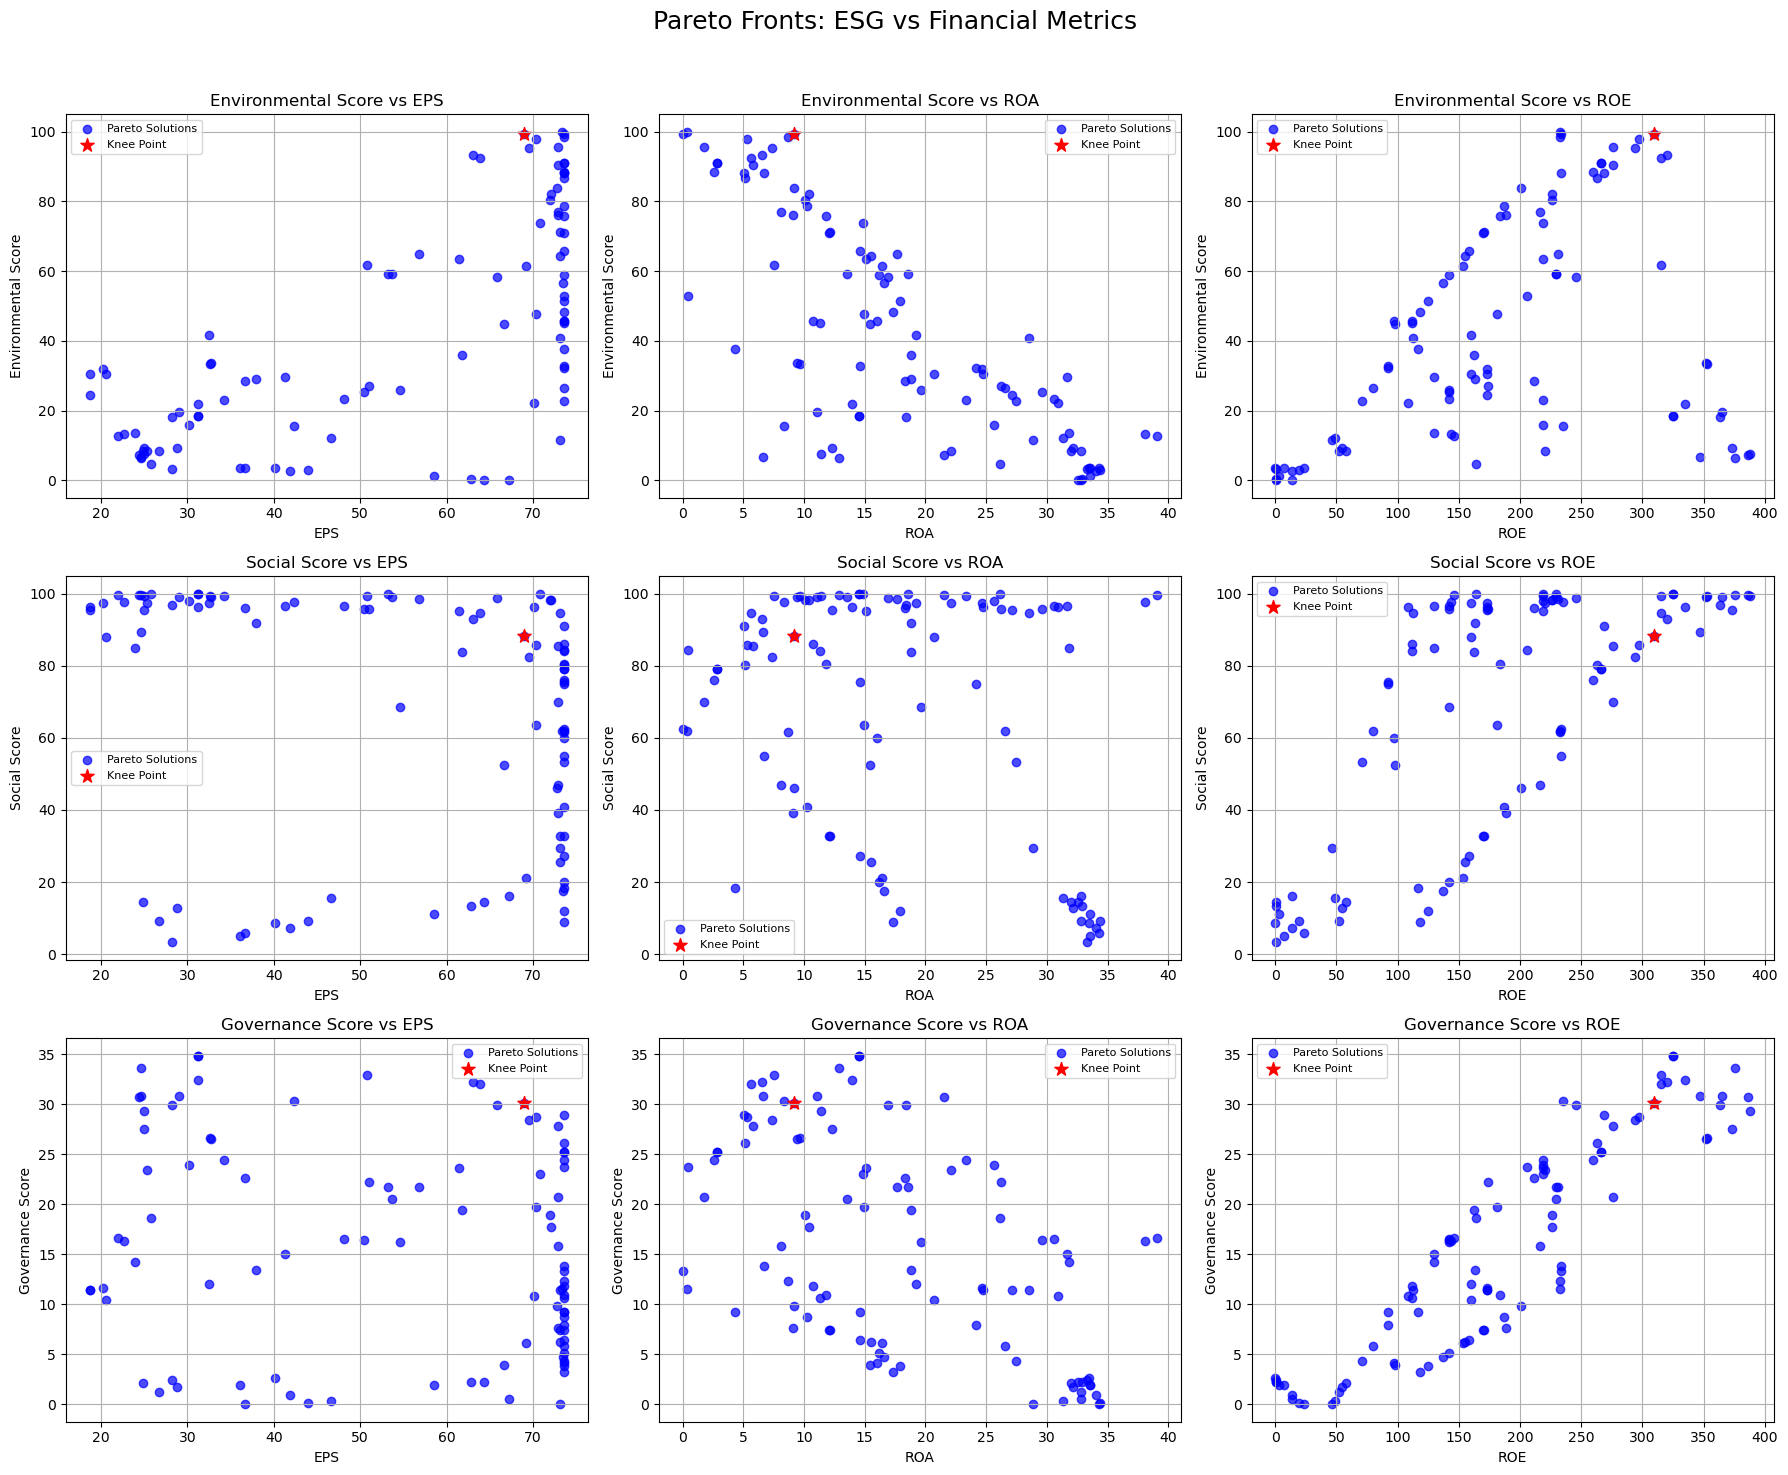

In [31]:
objective_labels = [
    "Environmental Score", "Social Score", "Governance Score",
    "EPS", "ROA", "ROE"
]

#plot_esg_vs_financial(pareto_objectives, knee_index, objective_labels)

plot_esg_vs_financial(
    pareto_objectives,
    knee_index,
    objective_labels,
    save_path="pareto_fronts_esg_vs_financial_USA_with_control_variables.jpg"
)


In [28]:


print(gam_roa.statistics_['m_features'])  # should be 6
print(gam_roa.terms)                      # shows which features were used


5
s(0) + s(1) + s(2) + f(3) + f(4) + te(3, 4) + te(0, 1) + te(0, 2) + te(1, 2) + te(0, 3) + te(0, 4) + te(1, 3) + te(1, 4) + te(2, 3) + te(2, 4) + intercept


In [32]:
print(gam_env.terms) 

s(0) + s(1) + s(2) + f(3) + f(4) + te(3, 4) + te(0, 1) + te(0, 2) + te(1, 2) + te(0, 3) + te(0, 4) + te(1, 3) + te(1, 4) + te(2, 3) + te(2, 4) + intercept


In [38]:
import numpy as np
import joblib
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

# Load trained GAM models for ESG pillar scores and ROA
gam_env = joblib.load("saved_gam_models_gridsearch/gam_model_Env_score.pkl")
gam_soc = joblib.load("saved_gam_models_gridsearch/gam_model_Soc_score.pkl")
gam_gov = joblib.load("saved_gam_models_gridsearch/gam_model_Gov_score.pkl")
gam_roa = joblib.load("models\gam_model_ROA.pkl")

class ESGWithGAMROA(Problem):
    def __init__(self):
        super().__init__(
            n_var=2,     # EPS, ROE only (ROA is predicted)
            n_obj=6,     # Env, Soc, Gov, EPS, GAM_ROA, ROE
            n_constr=9,  # ESG in [0, 100], EPS > 0, GAM_ROA > 0, ROE > 0
            xl=np.array([-731.89, -221.8]),  # Lower bounds for EPS, ROE
            xu=np.array([780.29, 529.3])     # Upper bounds for EPS, ROE
        )
    def _evaluate(self, X, out, *args, **kwargs):
        eps = X[:, 0]
        roe = X[:, 1]
    
        # Use random or fixed category codes
        #country_code = np.zeros(X.shape[0])
        # industry_code = np.zeros(X.shape[0])
        # mcap_code = np.zeros(X.shape[0])
        industry_code = np.round(np.clip(X[:, 3], 1, 4)).astype(int)
        mcap_code = np.round(np.clip(X[:, 4], 1, 4)).astype(int)



        
        # country_code = np.random.choice(df['Country_code'].unique(), size=X.shape[0])
        # industry_code = np.random.choice(df['Industry_code'].unique(), size=X.shape[0])
        # mcap_code = np.random.choice(df['MCap_code'].unique(), size=X.shape[0])
    
        # Dummy ESG (to be predicted)
        env = np.zeros(X.shape[0])
        soc = np.zeros(X.shape[0])
        gov = np.zeros(X.shape[0])
        
        # Predict ESG scores
        X_esg = np.column_stack([eps, roe, np.zeros(X.shape[0]), industry_code, mcap_code])
        # esg_env = np.clip(gam_environment.predict(X_esg), 0, 100)
        # esg_soc = np.clip(gam_social.predict(X_esg), 0, 100)
        # esg_gov = np.clip(gam_governance.predict(X_esg), 0, 100)

        esg_env = gam_environment.predict(X_esg)
        esg_soc = gam_social.predict(X_esg)
        esg_gov = gam_governance.predict(X_esg)
    
        # Predict ROA from ESG
        # X_roa = np.column_stack([esg_env, esg_soc, esg_gov, country_code, industry_code, mcap_code])
        X_roa = np.column_stack([esg_env, esg_soc, esg_gov, industry_code, mcap_code])
        predicted_roa = gam_roa.predict(X_roa)
    
        # Objectives (to maximize → minimize negative)
        out["F"] = -np.column_stack([
            esg_env,
            esg_soc,
            esg_gov,
            eps,
            predicted_roa,
            roe
        ])
    
        # Constraints
        out["G"] = np.column_stack([
            esg_env - 100,
            -esg_env,
            esg_soc - 100,
            -esg_soc,
            esg_gov - 100,
            -esg_gov,
            -eps,
            -roe,
            -predicted_roa,
        ])

# Instantiate the optimization problem
problem = ESGWithGAMROA()

# NSGA-II algorithm
algorithm = NSGA2(
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

# Run optimization
res = minimize(
    problem,
    algorithm=algorithm,
    termination=('n_gen', 200),
    seed=1,
    verbose=True
)

# Display results
if res.F is not None and len(res.F) > 0:
    pareto_solutions = res.X
    pareto_objectives = -res.F  # Flip signs back

    for i in range(min(10, len(pareto_solutions))):
        eps = pareto_solutions[i, 0]
        roe = pareto_solutions[i, 1]
        roa = pareto_objectives[i, 4]

        print(f"\nPareto Solution {i+1}:")
        print(f"EPS: {eps:.2f}, ROE: {roe:.2f}, ROA (GAM-predicted): {roa:.2f}")
        print(f"Environmental Score: {pareto_objectives[i, 0]:.2f}")
        print(f"Social Score:        {pareto_objectives[i, 1]:.2f}")
        print(f"Governance Score:    {pareto_objectives[i, 2]:.2f}")
        print(f"EPS (Objective):     {pareto_objectives[i, 3]:.2f}")
        print(f"ROA (Objective):     {pareto_objectives[i, 4]:.2f}")
        print(f"ROE (Objective):     {pareto_objectives[i, 5]:.2f}")
else:
    print("⚠️ No feasible Pareto solutions found.")

<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\g'
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10108\269032858.py:14: SyntaxWarning: invalid escape sequence '\g'
  gam_roa = joblib.load("models\gam_model_ROA.pkl")
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10108\269032858.py:14: SyntaxWarning: invalid escape sequence '\g'
  gam_roa = joblib.load("models\gam_model_ROA.pkl")


IndexError: index 4 is out of bounds for axis 1 with size 4

In [23]:
import numpy as np
import joblib
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

# Load trained GAM models for ESG pillar scores and ROA
gam_env = joblib.load("saved_gam_models_gridsearch/gam_model_Env_score.pkl")
gam_soc = joblib.load("saved_gam_models_gridsearch/gam_model_Soc_score.pkl")
gam_gov = joblib.load("saved_gam_models_gridsearch/gam_model_Gov_score.pkl")
gam_roa = joblib.load("models\gam_model_ROA.pkl")

class ESGWithGAMROAProblem(Problem):
    def __init__(self):
        super().__init__(
            n_var=2,      # Variables: EPS, ROE
            n_obj=6,      # Objectives: Env, Soc, Gov, EPS, predicted ROA, ROE
            n_constr=9,   # Constraints on ESG scores, EPS, ROE, predicted ROA
            xl=np.array([-731.89, -221.8]),  # Lower bounds for EPS, ROE
            xu=np.array([780.29, 529.3])     # Upper bounds for EPS, ROE
        )

    def _evaluate(self, X, out, *args, **kwargs):
        eps = X[:, 0]
        roe = X[:, 1]

        # Dummy categorical codes (replace 0 with other codes if needed)
        # Dummy categorical codes (set to valid range)
        # industry_code = np.ones(X.shape[0])   # dummy industry code in [1, 5]
        # mcap_code = np.ones(X.shape[0])       # dummy mcap code in [1, 4]
        industry_code = np.zeros(X.shape[0])
        mcap_code = np.zeros(X.shape[0])

        X_esg = np.column_stack([eps, roe, np.zeros_like(eps), industry_code, mcap_code])
        # X_esg = np.column_stack([eps, roe, np.zeros_like(eps), industry_code, mcap_code])


        # Predict ESG scores
        esg_env = gam_env.predict(X_esg)
        esg_soc = gam_soc.predict(X_esg)
        esg_gov = gam_gov.predict(X_esg)

        # Inputs to ROA model: [Env_score, Soc_score, Gov_score, industry_code, mcap_code]
        X_roa = np.column_stack([esg_env, esg_soc, esg_gov, industry_code, mcap_code])
        predicted_roa = gam_roa.predict(X_roa)

        # Objectives (maximize, so negate)
        out["F"] = -np.column_stack([
            esg_env,
            esg_soc,
            esg_gov,
            eps,
            predicted_roa,
            roe
        ])

        # Constraints
        out["G"] = np.column_stack([
            esg_env - 100,
            esg_soc - 100,
            esg_gov - 100,
            0 - esg_env,
            0 - esg_soc,
            0 - esg_gov,
            0 - eps,
            0 - roe,
            0 - predicted_roa
        ])



problem = ESGWithGAMROAProblem()

algorithm = NSGA2(pop_size=200)

res = minimize(
    problem,
    algorithm,
    termination=('n_gen', 100),  # or adjust as needed
    seed=1,
    verbose=True
)

# Extract Pareto-optimal front
pareto_X = res.X
pareto_F = -res.F  # Negated back to get maximized values

# Optional: Print or plot the Pareto front
import matplotlib.pyplot as plt

plt.scatter(pareto_F[:, 0], pareto_F[:, 4], c='green', label='Env vs ROA')
plt.xlabel("Environmental Score")
plt.ylabel("Predicted ROA")
plt.title("Pareto Front: ESG vs ROA")
plt.legend()
plt.grid(True)
plt.show()




<>:11: SyntaxWarning: invalid escape sequence '\g'
<>:11: SyntaxWarning: invalid escape sequence '\g'
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10108\2572092431.py:11: SyntaxWarning: invalid escape sequence '\g'
  gam_roa = joblib.load("models\gam_model_ROA.pkl")
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10108\2572092431.py:11: SyntaxWarning: invalid escape sequence '\g'
  gam_roa = joblib.load("models\gam_model_ROA.pkl")


ValueError: X data is out of domain for categorical feature 4. Expected data on [1.0, 4.0], but found data on [0.0, 0.0]

In [21]:
import numpy as np
import joblib
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

# Load trained GAM models
gam_environment = joblib.load("saved_gam_models_gridsearch/gam_model_Env_score.pkl")
gam_social = joblib.load("saved_gam_models_gridsearch/gam_model_Soc_score.pkl")
gam_governance = joblib.load("saved_gam_models_gridsearch/gam_model_Gov_score.pkl")
gam_roa = joblib.load("saved_gam_models_gridsearch/gam_model_ROA.pkl") 

class ESGWithGAMROA(Problem):
    def __init__(self):
        super().__init__(
            n_var=2,     # EPS, ROE
            n_obj=6,     # Env, Soc, Gov, EPS, ROA, ROE
            n_constr=6,  # ESG ∈ [0, 100], EPS > 0, ROE > 0, ROA > 0
            xl=np.array([-46.4, -372.2]),   
            xu=np.array([73.6, 612.3])
        )

    def _evaluate(self, X, out, *args, **kwargs):
        eps = X[:, 0]
        roe = X[:, 1]

        # Placeholder values for categorical features if needed
        industry_code = np.zeros(X.shape[0])
        mcap_code = np.zeros(X.shape[0])

        # Construct ESG prediction input
        X_esg = np.column_stack([eps, roe, np.zeros(X.shape[0]), industry_code, mcap_code])

        # Predict ESG scores
        esg_env = np.clip(gam_environment.predict(X_esg), 0, 100)
        esg_soc = np.clip(gam_social.predict(X_esg), 0, 100)
        esg_gov = np.clip(gam_governance.predict(X_esg), 0, 100)

        # Predict ROA
        X_roa = np.column_stack([esg_env, esg_soc, esg_gov, industry_code, mcap_code])
        predicted_roa = gam_roa.predict(X_roa)

        # Objective: Maximize each (minimize negative)
        out["F"] = -np.column_stack([
            esg_env,
            esg_soc,
            esg_gov,
            eps,
            predicted_roa,
            roe
        ])

        # Constraints (all must be ≤ 0 to be feasible)
        out["G"] = np.column_stack([
            np.maximum(0, esg_env - 100),
            np.maximum(0, esg_soc - 100),
            np.maximum(0, esg_gov - 100),
            np.maximum(0, -eps),         # EPS > 0 → -EPS < 0
            np.maximum(0, -roe),         # ROE > 0
            np.maximum(0, -predicted_roa)  # ROA > 0
        ])

# Instantiate the problem
problem = ESGWithGAMROA()

# NSGA-II Algorithm
algorithm = NSGA2(
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

# Run optimization
res = minimize(
    problem,
    algorithm=algorithm,
    termination=('n_gen', 200),
    seed=1,
    verbose=True
)

# Print results
if res.F is not None and len(res.F) > 0:
    pareto_solutions = res.X
    pareto_objectives = -res.F  # Flip signs

    for i in range(min(10, len(pareto_solutions))):
        eps = pareto_solutions[i, 0]
        roe = pareto_solutions[i, 1]
        roa = pareto_objectives[i, 4]

        print(f"\nPareto Solution {i+1}:")
        print(f"EPS:                 {eps:.2f}")
        print(f"ROE:                 {roe:.2f}")
        print(f"ROA (Predicted):     {roa:.2f}")
        print(f"Environmental Score: {pareto_objectives[i, 0]:.2f}")
        print(f"Social Score:        {pareto_objectives[i, 1]:.2f}")
        print(f"Governance Score:    {pareto_objectives[i, 2]:.2f}")
else:
    print("⚠️ No feasible Pareto solutions found.")


ValueError: X data is out of domain for categorical feature 4. Expected data on [1.0, 4.0], but found data on [0.0, 0.0]

In [42]:
import numpy as np
import joblib
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

# Load trained GAM models for ESG pillar scores and ROA
gam_environment = joblib.load("saved_gam_models_gridsearch/gam_model_Env_score.pkl")
gam_social = joblib.load("saved_gam_models_gridsearch/gam_model_Soc_score.pkl")
gam_governance = joblib.load("saved_gam_models_gridsearch/gam_model_Gov_score.pkl")
gam_roa = joblib.load("models\gam_model_ROA.pkl") 

class ESGWithGAMROA_USA(Problem):
    def __init__(self):
        super().__init__(
            n_var=2,     # EPS, ROE only (ROA wordt voorspeld)
            n_obj=6,     # Env, Soc, Gov, EPS, GAM_ROA, ROE
            n_constr=9,  # ESG in [0, 100], EPS > 0, GAM_ROA > 0, ROE > 0
            xl=np.array([-46.4, -372.2]),   # EPS, ROE ondergrens
            xu=np.array([73.6, 612.3])      # EPS, ROE bovengrens
        )
    
    def _evaluate(self, X, out, *args, **kwargs):
        eps = X[:, 0]
        roe = X[:, 1]
    
        # country_code is not used in USA but we put zero as placeholder
        industry_code = np.zeros(X.shape[0])
        mcap_code = np.zeros(X.shape[0])
    
        # Prepare input with 5 features expected by model
        X_esg = np.column_stack([eps, roe, country_code, industry_code, mcap_code])
    
        esg_env = gam_environment.predict(X_esg)
        esg_soc = gam_social.predict(X_esg)
        esg_gov = gam_governance.predict(X_esg)
    
        X_roa = np.column_stack([esg_env, esg_soc, esg_gov, country_code, industry_code, mcap_code])
        predicted_roa = gam_roa.predict(X_roa)
    
        out["F"] = -np.column_stack([
            esg_env,
            esg_soc,
            esg_gov,
            eps,
            predicted_roa,
            roe
        ])
    
        out["G"] = np.column_stack([
            esg_env - 100,
            -esg_env,
            esg_soc - 100,
            -esg_soc,
            esg_gov - 100,
            -esg_gov,
            -eps,
            -roe,
            -predicted_roa,
        ])


# Initialiseer het optimalisatieprobleem
problem = ESGWithGAMROA_USA()

# NSGA-II algoritme
algorithm = NSGA2(
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

# Voer de optimalisatie uit
res = minimize(
    problem,
    algorithm=algorithm,
    termination=('n_gen', 200),
    seed=1,
    verbose=True
)

# Toon de resultaten
if res.F is not None and len(res.F) > 0:
    pareto_solutions = res.X
    pareto_objectives = -res.F  # teken de positieve waarden af

    for i in range(min(10, len(pareto_solutions))):
        eps = pareto_solutions[i, 0]
        roe = pareto_solutions[i, 1]
        roa = pareto_objectives[i, 4]

        print(f"\nPareto Solution {i+1}:")
        print(f"EPS: {eps:.2f}, ROE: {roe:.2f}, ROA (GAM-predicted): {roa:.2f}")
        print(f"Environmental Score: {pareto_objectives[i, 0]:.2f}")
        print(f"Social Score:        {pareto_objectives[i, 1]:.2f}")
        print(f"Governance Score:    {pareto_objectives[i, 2]:.2f}")
        print(f"EPS (Objective):     {pareto_objectives[i, 3]:.2f}")
        print(f"ROA (Objective):     {pareto_objectives[i, 4]:.2f}")
        print(f"ROE (Objective):     {pareto_objectives[i, 5]:.2f}")
else:
    print("⚠️ No feasible Pareto solutions found.")


<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\g'
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_25280\4253336019.py:14: SyntaxWarning: invalid escape sequence '\g'
  gam_roa = joblib.load("models\gam_model_ROA.pkl")
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_25280\4253336019.py:14: SyntaxWarning: invalid escape sequence '\g'
  gam_roa = joblib.load("models\gam_model_ROA.pkl")


ValueError: X data is out of domain for categorical feature 4. Expected data on [1.0, 4.0], but found data on [0.0, 0.0]

In [38]:
import numpy as np
import joblib
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

# Load trained GAM models for ESG pillar scores and ROA
gam_environment = joblib.load("saved_gam_models_gridsearch/gam_model_Env_score.pkl")
gam_social = joblib.load("saved_gam_models_gridsearch/gam_model_Soc_score.pkl")
gam_governance = joblib.load("saved_gam_models_gridsearch/gam_model_Gov_score.pkl")
gam_roa = joblib.load("models\gam_model_ROA.pkl") 

class ESGWithGAMROA(Problem):
    def __init__(self):
        super().__init__(
            n_var=2,     # EPS, ROE only (ROA is predicted)
            n_obj=6,     # Env, Soc, Gov, EPS, GAM_ROA, ROE
            n_constr=9,  # ESG in [0, 100], EPS > 0, GAM_ROA > 0, ROE > 0
            xl=np.array([-46.4, -372.2]),   # EPS, ROE
            xu=np.array([73.6, 612.3])
        )
    def _evaluate(self, X, out, *args, **kwargs):
        eps = X[:, 0]
        roe = X[:, 1]
    
        # Use random or fixed category codes
        country_code = np.zeros(X.shape[0])
        industry_code = np.zeros(X.shape[0])
        mcap_code = np.zeros(X.shape[0])
    
        # Dummy ESG (to be predicted)
        env = np.zeros(X.shape[0])
        soc = np.zeros(X.shape[0])
        gov = np.zeros(X.shape[0])
        
        # Predict ESG scores
        X_esg = np.column_stack([eps, roe, np.zeros(X.shape[0]), country_code, industry_code, mcap_code])
        # esg_env = np.clip(gam_environment.predict(X_esg), 0, 100)
        # esg_soc = np.clip(gam_social.predict(X_esg), 0, 100)
        # esg_gov = np.clip(gam_governance.predict(X_esg), 0, 100)

        esg_env = gam_environment.predict(X_esg)
        esg_soc = gam_social.predict(X_esg)
        esg_gov = gam_governance.predict(X_esg)
    
        # Predict ROA from ESG
        # X_roa = np.column_stack([esg_env, esg_soc, esg_gov, country_code, industry_code, mcap_code])
        X_roa = np.column_stack([esg_env, esg_soc, esg_gov, country_code, industry_code, mcap_code])
        predicted_roa = gam_roa.predict(X_roa)
    
        # Objectives (to maximize → minimize negative)
        out["F"] = -np.column_stack([
            esg_env,
            esg_soc,
            esg_gov,
            eps,
            predicted_roa,
            roe
        ])
    
        # Constraints
        out["G"] = np.column_stack([
            esg_env - 100,
            -esg_env,
            esg_soc - 100,
            -esg_soc,
            esg_gov - 100,
            -esg_gov,
            -eps,
            -roe,
            -predicted_roa,
        ])

# Instantiate the optimization problem
problem = ESGWithGAMROA()

# NSGA-II algorithm
algorithm = NSGA2(
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

# Run optimization
res = minimize(
    problem,
    algorithm=algorithm,
    termination=('n_gen', 200),
    seed=1,
    verbose=True
)

# Display results
if res.F is not None and len(res.F) > 0:
    pareto_solutions = res.X
    pareto_objectives = -res.F  # Flip signs back

    for i in range(min(10, len(pareto_solutions))):
        eps = pareto_solutions[i, 0]
        roe = pareto_solutions[i, 1]
        roa = pareto_objectives[i, 4]

        print(f"\nPareto Solution {i+1}:")
        print(f"EPS: {eps:.2f}, ROE: {roe:.2f}, ROA (GAM-predicted): {roa:.2f}")
        print(f"Environmental Score: {pareto_objectives[i, 0]:.2f}")
        print(f"Social Score:        {pareto_objectives[i, 1]:.2f}")
        print(f"Governance Score:    {pareto_objectives[i, 2]:.2f}")
        print(f"EPS (Objective):     {pareto_objectives[i, 3]:.2f}")
        print(f"ROA (Objective):     {pareto_objectives[i, 4]:.2f}")
        print(f"ROE (Objective):     {pareto_objectives[i, 5]:.2f}")
else:
    print("⚠️ No feasible Pareto solutions found.")


ValueError: X data must have 5 features, but found 6